reference : https://www.kaggle.com/code/heeraldedhia/text-classification-nlp/notebook

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# NLP
# import nltk
# from nltk.corpus import stopwords
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from PIL import Image
# from nltk.tokenize import word_tokenize
# from nltk.util import ngrams
# import string

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
import re,string,unicodedata

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets
import warnings 
warnings.filterwarnings("ignore")




#Importing the basic librarires for building model - classification

from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.preprocessing import LabelEncoder,StandardScaler

/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("data/glassdoor_webscraped.csv")

In [3]:
df.head()
df = df.loc[:, "rating":"cons"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  9887 non-null   float64
 1   pros    9887 non-null   object 
 2   cons    9887 non-null   object 
dtypes: float64(1), object(2)
memory usage: 231.9+ KB


In [5]:
df.dropna(inplace = True)

In [6]:
df['pros'] = df['pros'].str.lower()
df['cons'] = df['cons'].str.lower()

In [7]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [8]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
df['pros']=df['pros'].apply(remove_stopwords)
df['cons']=df['cons'].apply(remove_stopwords)

{'or', "doesn't", 'mightn', "haven't", 'yourself', 'because', 'than', 'o', 'now', 'shan', 'both', "wouldn't", 'about', "she's", "mightn't", 'was', 'ain', 'themselves', 'on', 'how', 't', 'most', 'this', 'at', "needn't", 'won', 'theirs', 've', "isn't", "wasn't", 'and', 'up', 'just', 'few', 'my', 'hers', 'under', 'couldn', 'weren', 'only', 'then', 'below', 'she', 'own', 'such', "you've", 'same', 'until', 'above', 'here', 'hasn', 'did', 'y', 'further', 'by', 'through', 'these', 'having', 'out', 'during', 'me', 'had', "hadn't", 'ourselves', 'it', 'of', "aren't", 'are', "weren't", 'am', 'a', 'when', 'off', 'were', 'over', 'if', 'their', 'haven', 'mustn', 'we', 'will', "you'd", 'been', 'what', "don't", "should've", 'her', 're', "shouldn't", 'yours', "shan't", 'isn', 'too', 'is', 'some', 'very', 'from', 'wasn', 'whom', 'against', 'those', 'there', "you'll", 'doing', "that'll", 'nor', 'each', "won't", 'for', 'can', 'down', 'itself', 'i', 'before', 'didn', 'any', 'as', 'needn', 'more', 'have', '

In [9]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',str(text))
    return text
#Apply function on review column
df['pros']=df['pros'].apply(remove_special_characters)
df['cons']=df['cons'].apply(remove_special_characters)

In [10]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


#Apply function on review column
df['pros']=df['pros'].apply(lemmatize_text)
df['cons']=df['cons'].apply(lemmatize_text)

In [11]:
df['pros'] = [','.join(map(str, l)) for l in df['pros']]
df['cons'] = [','.join(map(str, l)) for l in df['cons']]

In [12]:
df.head()

,rating,pros,cons
0,5.0,"leader,support,transparency,benefit,worklife,b...","found,con,yet"
1,5.0,"quickly,move,access,networking,people,position...","large,company,decent,amount,red,tape"
2,5.0,"high,income,potential,upward,mobility","pressure,cooker,high,expectation,stress,expected"
3,5.0,"excellent,growth,networking,opportunity","many,con,think"
4,5.0,"given,freedom,flexibility,explore,multiple,rol...","still,startup,mentality,keep,mind,entail"


### Pros

In [13]:
tfvec = TfidfVectorizer(stop_words='english')
matrix = tfvec.fit_transform(df['pros'])
counts = pd.DataFrame(matrix.toarray(),
                  index=df['rating'],
                  columns=tfvec.get_feature_names())

counts.head()

,00,10,100,1000,10000,100k,100mo,100month,100mth,1010,...,yoy,yr,yummy,yummys,zahid,zealous,zero,zip,zone,zoo
rating,,,,,,,,,,,,,,,,,,,,,
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
matrix = tfvec.fit_transform(df['pros'])
tfid = pd.DataFrame(matrix.toarray(),
                      columns=tfvec.get_feature_names())

# Show us the top 10 most common words
counts.T.sort_values(by=0, ascending=False).head(10)

,0,1,2,3,4,5,6,7,8,9,...,9877,9878,9879,9880,9881,9882,9883,9884,9885,9886
transparency,0.539598,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
leader,0.448614,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
support,0.426575,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.160818,0.0,...,0.000000,0.000000,0.394237,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
worklife,0.414642,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.504476
balance,0.321626,0.0,0.0,0.0,0.0,0.520343,0.0,0.000000,0.060626,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.391308
benefit,0.224147,0.0,0.0,0.0,0.0,0.000000,0.0,0.403242,0.042251,0.0,...,0.258482,0.264736,0.207154,0.0,0.613149,0.167711,0.0,0.240744,0.0,0.000000
person,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
pertains,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
perspective,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
personnel,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000


In [ ]:
# docs = list(df['pros'])
# tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
# tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
# docs = tfidf_vectorizer_vectors.toarray()

In [ ]:
# tfvec.get_feature_names()[:20]

In [20]:
# a = tfvec_mat.sum(axis=0)
# pd.DataFrame(a, columns=words).transpose().sort_values(by=0, ascending=False)[:20]

TfidfVectorizer(stop_words='english')

## Predicting Using Pro column

#### Baseline

In [21]:
# Baseline Prediction
base_line = df['rating'].value_counts(normalize = True)
print(base_line)

5.0    0.576616
4.0    0.241024
3.0    0.100435
2.0    0.047436
1.0    0.034490
Name: rating, dtype: float64


<AxesSubplot:>

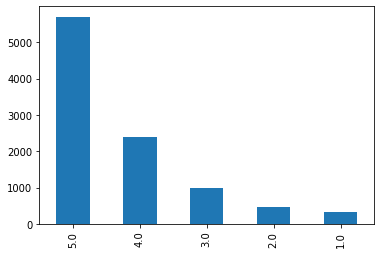

In [22]:
pd.value_counts(df['rating']).plot.bar()

In [57]:
X = tfid 
y = df['rating']
print(X.shape, y.shape)

(9887, 6092) (9887,)


In [58]:
matrix

<9887x6092 sparse matrix of type '<class 'numpy.float64'>'
	with 107908 stored elements in Compressed Sparse Row format>

In [60]:
# Train test split
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7909, 6092) (7909,)
(1978, 6092) (1978,)


In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

In [61]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)
cv = cross_val_score(lr, X, y, cv=5)

print('Training score: ', lr.score(X_train, y_train))
print('Testing score: ', lr.score(X_test, y_test))

print()
print('Cross-validated scores:', cv)
print('Average cv score:', cv.mean())
print('Standard deviation of cv score:', cv.std())

Training score:  0.6471108863320268
Testing score:  0.5819009100101112

Cross-validated scores: [0.58695652 0.58796764 0.58573596 0.60748609 0.57561963]
Average cv score: 0.5887531690272307
Standard deviation of cv score: 0.010357227520543712


In [27]:
# Random forest
rfc = RandomForestClassifier(n_estimators=100, oob_score=True)
rfc.fit(X_train, y_train)
cv = cross_val_score(rfc, X_train, y_train, cv=5)

print('Training score: ', rfc.score(X_train, y_train))
print('Testing score: ', rfc.score(X_test, y_test))

print()
print('Cross-validated scores:', cv)
print('Average cv score:', cv.mean())
print('Standard deviation of cv score:', cv.std())

Training score:  0.9911493235554432
Testing score:  0.6622851365015167

Cross-validated scores: [0.66118837 0.65676359 0.66561315 0.65486726 0.65464896]
Average cv score: 0.6586162640905635
Standard deviation of cv score: 0.004214240027938028


<AxesSubplot:>

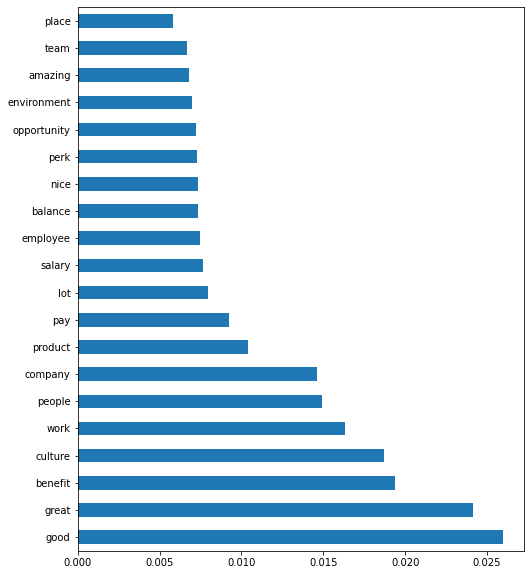

In [48]:
feat_importances = pd.Series(rfc.feature_importances_, 
                             index=counts.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(8, 10))

In [49]:
# K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
cv = cross_val_score(knn, X, y, cv=5)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

print()
print('Cross-validated scores:', cv)
print('Average score:', cv.mean())
print('Standard deviation of score:', cv.std())

0.46074092805664435
0.3114256825075834

Cross-validated scores: [0.32305359 0.49393327 0.47850278 0.31664138 0.34395549]
Average score: 0.3912173002675357
Standard deviation of score: 0.07824431453309057


In [62]:
# from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
cv = cross_val_score(dt, X_train, y_train, cv=5)
print()
print('Cross-validated scores:', cv)
print('Average score:', cv.mean())
print ('Trainning Score:', dt.score(X_train, y_train))
print ('Test Score:', dt.score(X_test, y_test))


feat_importances = pd.Series(dt.feature_importances_, 
                             index=counts.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=(8, 10))





# Model3 - Support Vector Machines (SVM)
from sklearn.svm import SVC
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)
cv = cross_val_score(svc, X_train, y_train, cv=5)
print()
print('Cross-validated scores:', cv)
print('Average score:', cv.mean())
print ('Trainning Score:', svc.score(X_train, y_train))
print ('Test Score:', svc.score(X_test, y_test))



from sklearn.svm import LinearSVC

# Set dual=False to speed up training, and it's not needed
svc = LinearSVC(random_state=1, dual=False, max_iter=10000)
svc.fit(X_train, y_train)
cv = cross_val_score(svc, X_train, y_train, cv=5)

print()
print('Cross-validated scores:', cv)
print('Average score:', cv.mean())
print ('Trainning Score:', svc.score(X_train, y_train))
print ('Test Score:', svc.score(X_test, y_test))


Cross-validated scores: [0.57522124 0.58533502 0.57206068 0.57142857 0.57938014]
Average score: 0.5766851302325098
Trainning Score: 0.9911493235554432
Test Score: 0.602123356926188

Cross-validated scores: [0.59797724 0.59734513 0.59608091 0.58723135 0.58633776]
Average score: 0.5929944801214805
Trainning Score: 0.6859274244531547
Test Score: 0.6031344792719919

Cross-validated scores: [0.60366625 0.59608091 0.61946903 0.60493047 0.60847565]
Average score: 0.6065244596268424
Trainning Score: 0.8030092299911493
Test Score: 0.6142568250758341


In [ ]:
# ### Naive Bayes Classifier
# #### Gaussian Naive Bayes

# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB() 
# gnb.fit(X_train, y_train)
# cv = cross_val_score(gnb, X, y, cv=5)

# print(gnb.score(X_train, y_train))
# print(gnb.score(X_test, y_test))

# print()
# print('Cross-validated scores:', cv)
# print('Average score:', cv.mean())
# print('Standard deviation of score:', cv.std())

reference : https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning
* https://www.datacamp.com/cheat-sheet/machine-learning-cheat-sheet